# Analysis of Movie Data
## Questions to be answered

1. Is there any correlation between critic and user ratings with box office results in the U.S.?


2. Which genres of film resulted in the greatest box office success?


3. Does MPAA rating affect the box office?


4.	How does the month of release affect box office results?


5.	Does runtime affect box office results?

In [1]:
#Import Dependancies
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import datetime as dt
import seaborn as sns ; sns.set()
from matplotlib.ticker import PercentFormatter

In [2]:
#Import the data
movies = pd.read_csv('Movie_Data.csv')
movies.head()

,IMDb ID,Title,Runtime (mins),Year,Genres,Release Date,IMDb Rating,Metascore,Rating,Box Office
0,tt1872181,The Amazing Spider-Man 2,142,2014,"Action, Adventure, Sci-Fi",4/10/2014,6.6,53,PG-13,183277573
1,tt1323594,Despicable Me,95,2010,"Animation, Comedy, Family, Fantasy",6/20/2010,7.7,72,PG,251476985
2,tt1375670,Grown Ups,102,2010,Comedy,6/24/2010,6.0,30,PG-13,162001186
3,tt0892769,How to Train Your Dragon,98,2010,"Animation, Action, Adventure, Family, Fantasy",3/18/2010,8.1,74,PG,216900000
4,tt1375666,Inception,148,2010,"Action, Adventure, Sci-Fi, Thriller",7/8/2010,8.8,74,PG-13,292568851


# 1. Analysis of Critics and User Rating

We want to see whether user rating (represented by IMDB rating) and critics rating (represented by the metascore) are significantly different for the films

If so, we want to see how the scores influence the box office return.

This will allow us to determine which score, if any, to target in the creation of our movie



# Testing Differences

### First, lets visualize the differences by displaying them as histograms

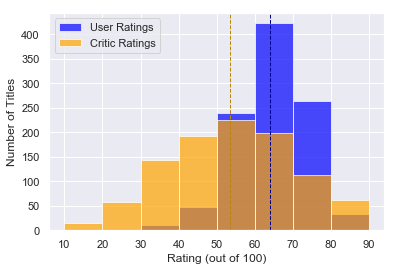

In [3]:
#Plot the histogram of the IMDb Rating to represent the user ratings
#Values are multiplied by 10 to show them on the same scale as the metascore
plt.hist(movies['IMDb Rating'] * 10, bins=[10, 20, 30, 40, 50 , 60, 70, 80, 90], label='User Ratings', alpha=0.7, color='blue')
plt.axvline(movies['IMDb Rating'].mean() * 10, color='darkblue', linestyle='dashed', linewidth=1)

#Plot the histogram of the Metacritic Rating to represent the critic rating ratings
plt.hist(movies['Metascore'], bins=[10, 20, 30, 40, 50 , 60, 70, 80, 90], label='Critic Ratings', alpha=0.7, color='orange')
plt.axvline(movies['Metascore'].mean(), color='darkgoldenrod', linestyle='dashed', linewidth=1)
plt.legend()
plt.xlabel('Rating (out of 100)')
plt.ylabel('Number of Titles')

plt.savefig("Analysis Charts/1. Critic and User Rating/Rating_Histogram.png")

plt.show()

## Observations

Looking at the histograms, we can see the average User score is higher than the average critic's score.

Most of the user ratings fall between 50 and 70, whereas the critics ratings are much more widely distributed




### Next, let's test to ensure the two are statistically different. We will be using a 2-sample T-test with a confidence level of 95% to make our determination

The hypothesis we are testing is the the two scores are different

The null hypothis is that the two score are the same

In [4]:
p_value = stats.ttest_ind(movies['IMDb Rating'] * 10, movies['Metascore'], equal_var=False)

print(f"The P value = {p_value[1]}")

The P value = 3.64643515520769e-62


## Observations

Since the P value is less than 5%, we need to reject the null hypothosis that the two scores are the same

### Now that we know the scores are different, let's visualized how the box office returns change given a change in each of the scores.

We can do this by using scatterplots. Again, the need to multipy the IMDb score by 10 to set the axis to be the same.

In [5]:
movies['Box Office'].max()

936658640

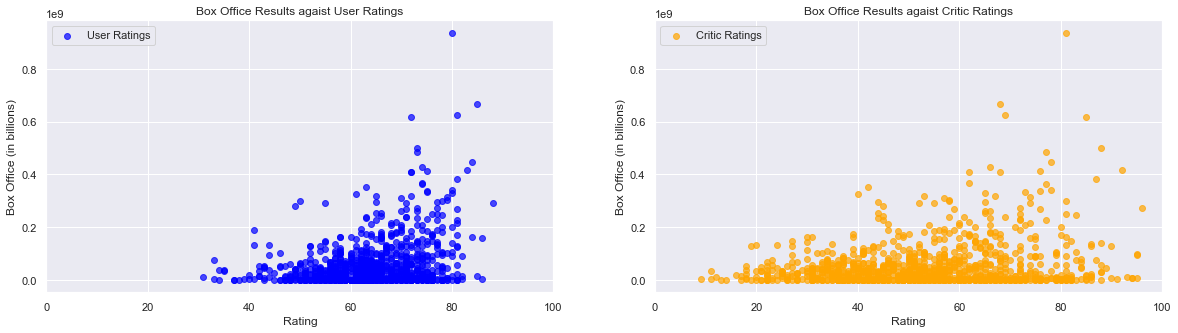

In [6]:
f = plt.figure(figsize=(20,5))

ax = plt.subplot(1,2,1)
ax.scatter(movies['IMDb Rating'] * 10, movies['Box Office'], label='User Ratings', alpha=0.7, color='blue')

ax2 = plt.subplot(1,2,2)
ax2.scatter(movies['Metascore'],movies['Box Office'], label='Critic Ratings', alpha=0.7, color='orange', )

ax.legend()
ax2.set_xbound(0,100)
ax.set_xbound(0,100)
ax2.legend()
ax.set_xlabel('Rating')
ax2.set_xlabel('Rating')
ax.set_ylabel('Box Office (in billions)')
ax2.set_ylabel('Box Office (in billions)')
ax.set_title('Box Office Results agaist User Ratings')
ax2.set_title('Box Office Results agaist Critic Ratings')

plt.savefig("Analysis Charts/1. Critic and User Rating/Rating_Scatter.png")

plt.show()

## Observations

As expected from the histogram, the critics ratings are have a much wider distribution than the User ratings

There are a large number of movies that, regardless of the rating, have very low box office numbers.

Although the correlation appears weak it does seem like the higher the rating is, there are more high box office movies there are

The variables seem to be highly correlated

### Now we're going to test the observation made in the scatter plots by using a regression analysis for each to see if the trend is satistically significant

In [7]:
regress_user = stats.linregress(movies['IMDb Rating'] * 10, movies['Box Office'])

regress_user

LinregressResult(slope=2800558.7969714804, intercept=-123764877.13609344, rvalue=0.28739826331757057, pvalue=8.601849051918464e-21, stderr=292959.3963561884)

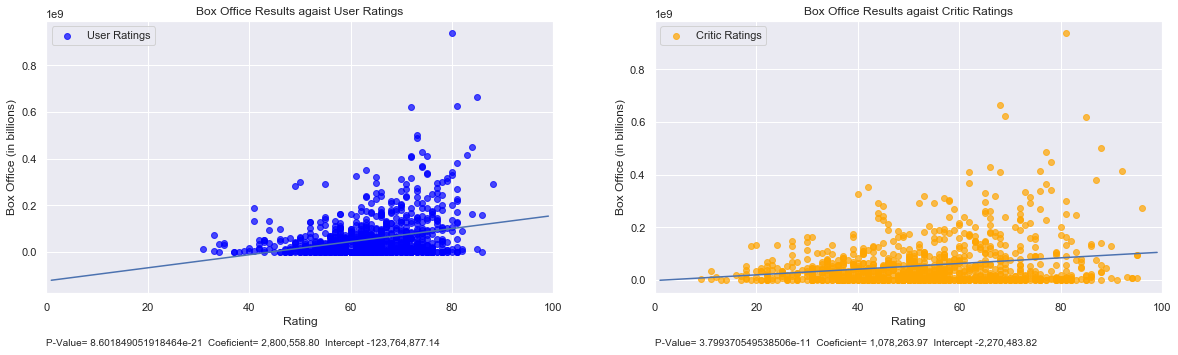

In [8]:
f = plt.figure(figsize=(20,5))
x = np.arange(1, 100, 1)
regress_user = stats.linregress(movies['IMDb Rating'] * 10, movies['Box Office'])
regress_critic = stats.linregress(movies['Metascore'], movies['Box Office'])

ax = plt.subplot(1,2,1)
ax.scatter(movies['IMDb Rating'] * 10, movies['Box Office'], label='User Ratings', alpha=0.7, color='blue')
ax.plot(x, x * regress_user[0] + regress_user[1])

ax2 = plt.subplot(1,2,2)
ax2.scatter(movies['Metascore'],movies['Box Office'], label='Critic Ratings', alpha=0.7, color='orange', )
ax2.plot(x, x * regress_critic[0] + regress_critic[1])

ax.legend()
ax2.set_xbound(0,100)
ax.set_xbound(0,100)
ax2.legend()
ax.set_xlabel('Rating')
ax2.set_xlabel('Rating')
ax.set_ylabel('Box Office (in billions)')
ax2.set_ylabel('Box Office (in billions)')
ax.set_title('Box Office Results agaist User Ratings')
ax2.set_title('Box Office Results agaist Critic Ratings')
ax.text(0, -4 * 100000000, 'P-Value= ' + str(regress_user[3]) + '  Coeficient= ' + "{:,.2f}".format(regress_user[0]) + '  Intercept ' + "{:,.2f}".format(regress_user[1]))
ax2.text(0, -2.5 * 100000000, 'P-Value= ' + str(regress_critic[3]) + '  Coeficient= ' + "{:,.2f}".format(regress_critic[0]) + '  Intercept ' + "{:,.2f}".format(regress_critic[1]))

plt.savefig("Analysis Charts/1. Critic and User Rating/Rating_LR.png")

plt.show()

## Observations

Simple linear regression for each of the variables show that, independantly, they are both significant



### Since both are independantly significant and they appear to be correlated, let's set up a multiple linear regression analysis to determine if they are both still significant together

In [9]:
X = movies[['IMDb Rating', 'Metascore']]
y = movies['Box Office']

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Box Office   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     45.70
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           9.92e-20
Time:                        11:21:59   Log-Likelihood:                -20004.
No. Observations:                1017   AIC:                         4.001e+04
Df Residuals:                    1014   BIC:                         4.003e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.263e+08   2.05e+07     -6.146      0.000   -1.67e+08   -8.59e+07
IMDb Rating  2.901e+07   4.34e+06      6.692      0.000    2.05e+07    3.75e+07
Metascore   -7.349e+04   2.34e+05     -0.315      0.753   -5.32e+05    3.85e+05
==============================================================================
Omnibus:                      719.680   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12911.763
Skew:                           3.047   Prob(JB):                         0.00
Kurtosis:                      19.357   Cond. No.                         446.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Observations

After including both variables in the model, we can see that the critic's ratings (Metascore) is no longer significant.

Even though user rating is found to be significant, this modle only has an adjusted R-squared of 0.081, meaning that only 8.3% of the variability is explained by the model.

As such, we should try to maximize the user rating of our film.


# ------------------------------------------------------------------------------

# 2. Analysis of Genres

We want to see whether the genres between movies have an affect on average box office earnings.

If so, we want to see which genres lead to the biggest earnings.

This will allow us to narrow down which genres are most popular.

In [10]:
# File to Load
movie_data = "Movie_Data.csv"

# Read the Movie Data
movie = pd.read_csv('Movie_Data.csv')

# Display the data table for preview
movie.head()

,IMDb ID,Title,Runtime (mins),Year,Genres,Release Date,IMDb Rating,Metascore,Rating,Box Office
0,tt1872181,The Amazing Spider-Man 2,142,2014,"Action, Adventure, Sci-Fi",4/10/2014,6.6,53,PG-13,183277573
1,tt1323594,Despicable Me,95,2010,"Animation, Comedy, Family, Fantasy",6/20/2010,7.7,72,PG,251476985
2,tt1375670,Grown Ups,102,2010,Comedy,6/24/2010,6.0,30,PG-13,162001186
3,tt0892769,How to Train Your Dragon,98,2010,"Animation, Action, Adventure, Family, Fantasy",3/18/2010,8.1,74,PG,216900000
4,tt1375666,Inception,148,2010,"Action, Adventure, Sci-Fi, Thriller",7/8/2010,8.8,74,PG-13,292568851


In [11]:
#Extract relevant columns
movie = movie[['Genres', 'Box Office', 'Year']]
movie.head()

,Genres,Box Office,Year
0,"Action, Adventure, Sci-Fi",183277573,2014
1,"Animation, Comedy, Family, Fantasy",251476985,2010
2,Comedy,162001186,2010
3,"Animation, Action, Adventure, Family, Fantasy",216900000,2010
4,"Action, Adventure, Sci-Fi, Thriller",292568851,2010


In [12]:
genre_set = set()
for row in movie['Genres'].str.split(", "):
    for genre in row:
        if genre not in genre_set:
            genre_set.add(genre)

In [13]:
genre_set = list(genre_set)

In [14]:
# Create a list 
averages_list = []
for genre in genre_set:
    mask = movie["Genres"].str.contains(f'{genre}')==True
    avg = movie[mask]["Box Office"].mean()
    averages_list.append(avg)

In [15]:
# Covert Box Office to millions
averages_list = [x/1000000 for x in averages_list]
averages_list

[26.34676623214286,
 0.061153,
 122.88188585526316,
 42.21486465384615,
 42.86875228703704,
 57.635095642857145,
 61.16326675,
 46.52079175884245,
 35.24443222767857,
 22.54826979761905,
 52.621246884514434,
 138.4912569032258,
 25.05508141860465,
 115.78014762727273,
 51.67360983636364,
 129.59390039215688,
 113.4111595549133,
 35.3096476626506,
 111.68704716666667,
 95.066479,
 29.383784037313433,
 2.98926508]

In [16]:
# Show Genres
genre_set

['Horror',
 'News',
 'Sci-Fi',
 'Sport',
 'Mystery',
 'Western',
 'War',
 'Thriller',
 'Romance',
 'Biography',
 'Comedy',
 'Animation',
 'History',
 'Family',
 'Music',
 'Adventure',
 'Fantasy',
 'Crime',
 'Musical',
 'Action',
 'Drama',
 'Documentary']

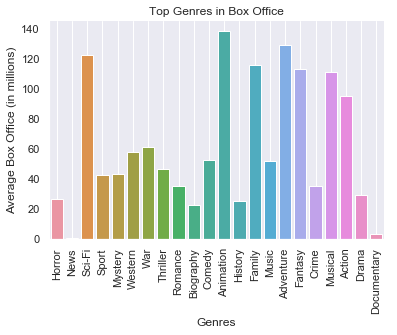

In [17]:
# Bar Chart to identify top Genres
sns.barplot(genre_set, averages_list)
sns.despine()
plt.xticks(rotation=90);

# Add labels to the x and y axes
plt.title("Top Genres in Box Office")
plt.xlabel("Genres")
plt.ylabel("Average Box Office (in millions)")

# Set your grid
plt.grid()

# Save the plot and display it
plt.savefig("Analysis Charts/2. Genres/Top_Genres.png")

# Show figure
plt.show()

In [18]:
#Plot changes over time with a Line graph

Animation = movie[movie["Genres"].str.contains("Animation")]

Animation.head()

,Genres,Box Office,Year
1,"Animation, Comedy, Family, Fantasy",251476985,2010
3,"Animation, Action, Adventure, Family, Fantasy",216900000,2010
10,"Animation, Adventure, Comedy, Family, Fantasy",414984497,2010
26,"Animation, Adventure, Comedy, Family, Fantasy",237282182,2012
40,"Animation, Comedy, Family, Fantasy",148280635,2012


In [19]:
animation2010 = Animation["Box Office"][Animation["Year"] == 2010].mean()
animation2011 = Animation["Box Office"][Animation["Year"] == 2011].mean()
animation2012 = Animation["Box Office"][Animation["Year"] == 2012].mean()
animation2013 = Animation["Box Office"][Animation["Year"] == 2013].mean()
animation2014 = Animation["Box Office"][Animation["Year"] == 2014].mean()
animation2015 = Animation["Box Office"][Animation["Year"] == 2015].mean()
animation2016 = Animation["Box Office"][Animation["Year"] == 2016].mean()

In [20]:
Adventure = movie[movie["Genres"].str.contains("Adventure")]

Adventure.head()

,Genres,Box Office,Year
0,"Action, Adventure, Sci-Fi",183277573,2014
3,"Animation, Action, Adventure, Family, Fantasy",216900000,2010
4,"Action, Adventure, Sci-Fi, Thriller",292568851,2010
5,"Action, Adventure, Sci-Fi",312057433,2010
9,"Action, Adventure, Fantasy, Sci-Fi",172051787,2010


In [21]:
adventure2010 = Adventure["Box Office"][Adventure["Year"] == 2010].mean()
adventure2011 = Adventure["Box Office"][Adventure["Year"] == 2011].mean()
adventure2012 = Adventure["Box Office"][Adventure["Year"] == 2012].mean()
adventure2013 = Adventure["Box Office"][Adventure["Year"] == 2013].mean()
adventure2014 = Adventure["Box Office"][Adventure["Year"] == 2014].mean()
adventure2015 = Adventure["Box Office"][Adventure["Year"] == 2015].mean()
adventure2016 = Adventure["Box Office"][Adventure["Year"] == 2016].mean()

In [22]:
SciFi = movie[movie["Genres"].str.contains("Sci-Fi")]

SciFi.head()

,Genres,Box Office,Year
0,"Action, Adventure, Sci-Fi",183277573,2014
4,"Action, Adventure, Sci-Fi, Thriller",292568851,2010
5,"Action, Adventure, Sci-Fi",312057433,2010
9,"Action, Adventure, Fantasy, Sci-Fi",172051787,2010
14,"Mystery, Sci-Fi, Thriller",79230923,2011


In [23]:
scifi2010 = SciFi["Box Office"][SciFi["Year"] == 2010].mean()
scifi2011 = SciFi["Box Office"][SciFi["Year"] == 2011].mean()
scifi2012 = SciFi["Box Office"][SciFi["Year"] == 2012].mean()
scifi2013 = SciFi["Box Office"][SciFi["Year"] == 2013].mean()
scifi2014 = SciFi["Box Office"][SciFi["Year"] == 2014].mean()
scifi2015 = SciFi["Box Office"][SciFi["Year"] == 2016].mean()
scifi2016 = SciFi["Box Office"][SciFi["Year"] == 2016].mean()

In [24]:
Family = movie[movie["Genres"].str.contains("Family")]

Family.head()

,Genres,Box Office,Year
1,"Animation, Comedy, Family, Fantasy",251476985,2010
3,"Animation, Action, Adventure, Family, Fantasy",216900000,2010
10,"Animation, Adventure, Comedy, Family, Fantasy",414984497,2010
26,"Animation, Adventure, Comedy, Family, Fantasy",237282182,2012
39,"Adventure, Family, Fantasy",303001229,2012


In [25]:
family2010 = Family["Box Office"][Family["Year"] == 2010].mean()
family2011 = Family["Box Office"][Family["Year"] == 2011].mean()
family2012 = Family["Box Office"][Family["Year"] == 2012].mean()
family2013 = Family["Box Office"][Family["Year"] == 2013].mean()
family2014 = Family["Box Office"][Family["Year"] == 2014].mean()
family2015 = Family["Box Office"][Family["Year"] == 2016].mean()
family2016 = Family["Box Office"][Family["Year"] == 2016].mean()

In [26]:
Years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016']
animation_list = [animation2010, animation2011, animation2012, animation2013, animation2014, animation2015, animation2016]
adventure_list = [adventure2010, adventure2011, adventure2012, adventure2013, adventure2014, adventure2015, adventure2016]
scifi_list = [scifi2010, scifi2011, scifi2012, scifi2013, scifi2014, scifi2015, scifi2016]
family_list = [family2010, family2011, family2012, family2013, family2014, family2015, family2016]

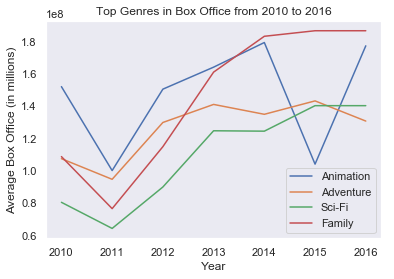

In [27]:
# Line chart to identify top Genres over Years
sns.lineplot(x= Years, y= animation_list, label = "Animation")
sns.lineplot(x= Years, y=adventure_list, label = "Adventure")
sns.lineplot(x= Years, y=scifi_list, label = "Sci-Fi")
sns.lineplot(x= Years, y=family_list, label = "Family")

# Add labels to the x and y axes
plt.title("Top Genres in Box Office from 2010 to 2016")
plt.xlabel("Year")
plt.ylabel("Average Box Office (in millions)")

# Set your grid
plt.grid()

# Save the plot and display it
plt.savefig("Analysis Charts/2. Genres/Top_Genres_Years.png")

# Show figure
plt.show()

## Observations
1) The top four genres based on box office revenue were animation, adventure, sci-fi, and fantasy.

2) Animation has the lowest box office revenue in 2015 compared to the other top genres.

3) Family genre has the lowest box office revenue compared to the other top genres, but it did had a gradual incline in revenue over the years.

## Highlight
Althought animation was the top genre with the highest box office revenue between 2010 to 2016, it had a lowest box office revenue in 2015 compared to the other top genres.

# ------------------------------------------------------------------------------

# 3. Analysis of MPAA Rating

We want to see whether MPAA rating has an affect on the average box office.

If so, we want to see which ratings have the best and worst outcomes.

This will help determine how graphic users prefer their movies to be.


In [28]:
#Read clean data
movies = pd.read_csv("Movie_Data.csv")
movies.head()

,IMDb ID,Title,Runtime (mins),Year,Genres,Release Date,IMDb Rating,Metascore,Rating,Box Office
0,tt1872181,The Amazing Spider-Man 2,142,2014,"Action, Adventure, Sci-Fi",4/10/2014,6.6,53,PG-13,183277573
1,tt1323594,Despicable Me,95,2010,"Animation, Comedy, Family, Fantasy",6/20/2010,7.7,72,PG,251476985
2,tt1375670,Grown Ups,102,2010,Comedy,6/24/2010,6.0,30,PG-13,162001186
3,tt0892769,How to Train Your Dragon,98,2010,"Animation, Action, Adventure, Family, Fantasy",3/18/2010,8.1,74,PG,216900000
4,tt1375666,Inception,148,2010,"Action, Adventure, Sci-Fi, Thriller",7/8/2010,8.8,74,PG-13,292568851


In [29]:
#Extract relevant columns
mpaa_df = movies[['Rating','Box Office']]
mpaa_df.head()

,Rating,Box Office
0,PG-13,183277573
1,PG,251476985
2,PG-13,162001186
3,PG,216900000
4,PG-13,292568851


In [30]:
#Create x value
ratings = []
for rating in mpaa_df['Rating']:
    if rating not in ratings:
        ratings.append(rating)
        
ratings

['PG-13', 'PG', 'R', 'G', 'NC-17', 'Not Rated']

In [31]:
#Create y value
df0 = mpaa_df[mpaa_df['Rating'] == ratings[0]].mean()
df1 = mpaa_df[mpaa_df['Rating'] == ratings[1]].mean()
df2 = mpaa_df[mpaa_df['Rating'] == ratings[2]].mean()
df3 = mpaa_df[mpaa_df['Rating'] == ratings[3]].mean()
df4 = mpaa_df[mpaa_df['Rating'] == ratings[4]].mean()
df5 = mpaa_df[mpaa_df['Rating'] == ratings[5]].mean()

average_box_office = [df0[0],df1[0],df2[0],df3[0],df4[0], df5[0]]
average_box_office = [x/1000000 for x in average_box_office]
average_box_office

[81.4896013923077,
 91.66613701587302,
 26.064236822072075,
 120.3966333076923,
 2.971782,
 0.2227295348837209]

In [32]:
# x and y values as a df
data = pd.DataFrame({"Rating":ratings,"Average Box Office (millions)":average_box_office})
data

,Rating,Average Box Office (millions)
0,PG-13,81.489601
1,PG,91.666137
2,R,26.064237
3,G,120.396633
4,NC-17,2.971782
5,Not Rated,0.222730


In [33]:
# sort data
average_box = sorted(data['Average Box Office (millions)'])

ratings = ratings
ratings = ['Not Rated','NC-17','R','PG-13','PG','G']
sorted_data = pd.DataFrame({"Rating":ratings,
                            "Average Box Office (millions)":average_box
})
sorted_data

,Rating,Average Box Office (millions)
0,Not Rated,0.222730
1,NC-17,2.971782
2,R,26.064237
3,PG-13,81.489601
4,PG,91.666137
5,G,120.396633


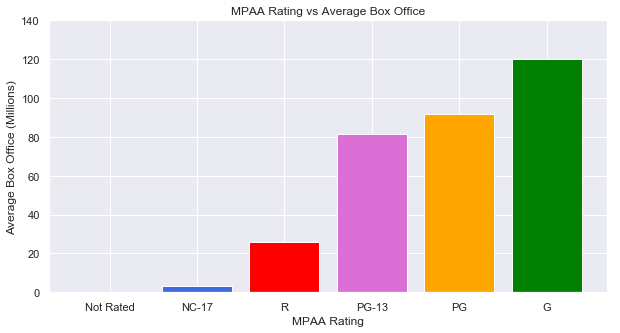

In [34]:
# bar chart showing relation
plt.figure(figsize=(10,5))
color=['maroon', 'royalblue', 'red','orchid','orange','green']
plt.bar(sorted_data['Rating'], sorted_data['Average Box Office (millions)'], color=color,align='center')
plt.ylim(0, 140)
plt.xlabel("MPAA Rating")
plt.ylabel("Average Box Office (Millions)")
plt.title("MPAA Rating vs Average Box Office")

# Save image
plt.savefig("Analysis Charts/3. MPAA/MPAA_bar.png")

plt.show()

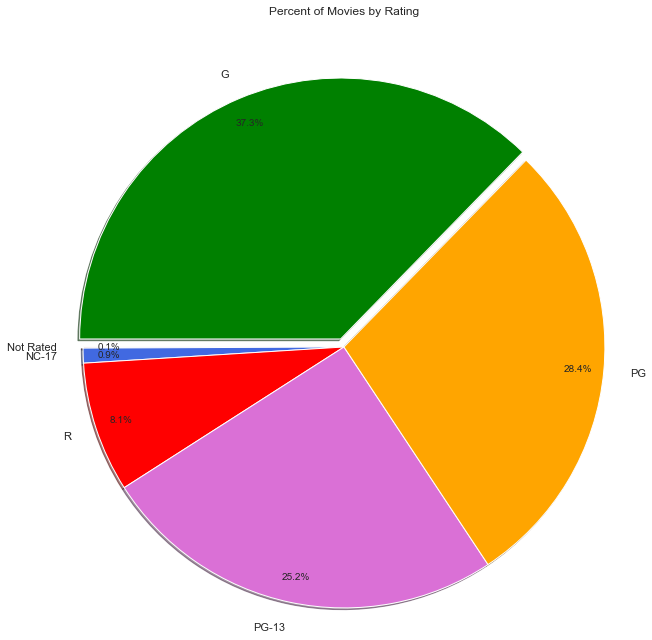

In [35]:
# pie chart showing relation
explode = [0,0,0,0,0,0.1]
colors = ['maroon', 'royalblue', 'red','orchid','orange','green']
plt.pie(sorted_data['Average Box Office (millions)'],labels=sorted_data['Rating'],colors=colors,explode=explode,autopct="%1.1f%%",shadow=True,pctdistance=0.9,radius=3,startangle=180)
plt.title("Percent of Movies by Rating",y=2)

# Save image
plt.savefig("Analysis Charts/3. MPAA/MPAA_pie.png", bbox_inches='tight')

plt.show()

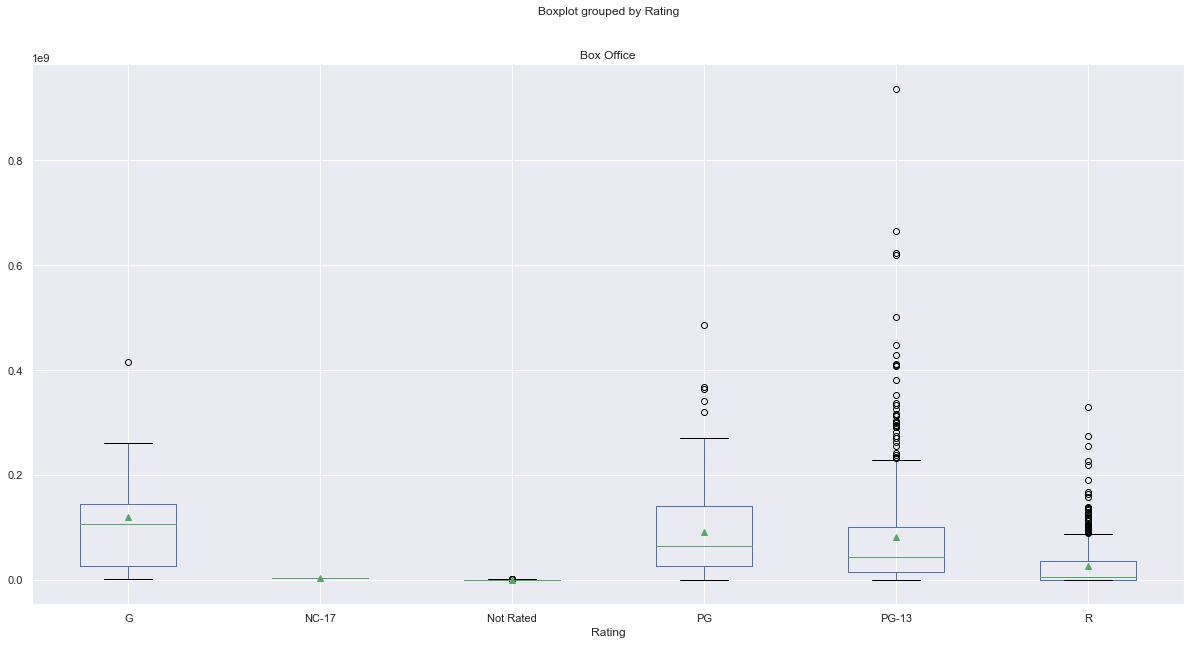

In [36]:
# Box plot
mpaa_df.boxplot("Box Office", by="Rating", figsize=(20, 10),showmeans=True)

# Save image
plt.savefig("Analysis Charts/3. MPAA/MPAA_box.png")

plt.show()

In [37]:
# ANOVA test
group1 = mpaa_df[mpaa_df["Rating"] == 'Not Rated']["Box Office"]
group2 = mpaa_df[mpaa_df["Rating"] == 'NC-17']["Box Office"]
group3 = mpaa_df[mpaa_df["Rating"] == 'R']["Box Office"]
group4 = mpaa_df[mpaa_df["Rating"] == 'PG-13']["Box Office"]
group5 = mpaa_df[mpaa_df["Rating"] == 'PG']["Box Office"]
group6 = mpaa_df[mpaa_df["Rating"] == 'G']["Box Office"]

stats.f_oneway(group1, group2, group3, group4, group5, group6)

F_onewayResult(statistic=29.37724940787404, pvalue=6.545578428438524e-28)

# Observation

* Based on the data, on average, G movies bring in the most box office revenue

* It appears that PG-13 rated movies have the movies with the highest earnings. However it also must have a lot of poorly performing movies as well, bringing the average down.

* R rated movies only has 8.1% of the average revenue, likely because of a more narrow audience.

* Using the ANOVA test, the pvalue is less than 0.05. The test is significant.


# ------------------------------------------------------------------------------

# 4. Analysis of Box Office Results by Month of Release

We want to see if there is a correlation between the money a movie makes at the box office and when the movie is released.

This will allow us to determine which the best time of year to release a movie.

In [38]:
#Read clean data
movies = pd.read_csv("Movie_Data.csv")
movies.head()

,IMDb ID,Title,Runtime (mins),Year,Genres,Release Date,IMDb Rating,Metascore,Rating,Box Office
0,tt1872181,The Amazing Spider-Man 2,142,2014,"Action, Adventure, Sci-Fi",4/10/2014,6.6,53,PG-13,183277573
1,tt1323594,Despicable Me,95,2010,"Animation, Comedy, Family, Fantasy",6/20/2010,7.7,72,PG,251476985
2,tt1375670,Grown Ups,102,2010,Comedy,6/24/2010,6.0,30,PG-13,162001186
3,tt0892769,How to Train Your Dragon,98,2010,"Animation, Action, Adventure, Family, Fantasy",3/18/2010,8.1,74,PG,216900000
4,tt1375666,Inception,148,2010,"Action, Adventure, Sci-Fi, Thriller",7/8/2010,8.8,74,PG-13,292568851


In [39]:
#Extract relevant columns
release = movies[['Title','Release Date','Box Office']]
release.head()

,Title,Release Date,Box Office
0,The Amazing Spider-Man 2,4/10/2014,183277573
1,Despicable Me,6/20/2010,251476985
2,Grown Ups,6/24/2010,162001186
3,How to Train Your Dragon,3/18/2010,216900000
4,Inception,7/8/2010,292568851


In [40]:
# Convert release date to datetime
release['Release Date'] =  pd.to_datetime(release['Release Date'])
release.head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Title,Release Date,Box Office
0,The Amazing Spider-Man 2,2014-04-10,183277573
1,Despicable Me,2010-06-20,251476985
2,Grown Ups,2010-06-24,162001186
3,How to Train Your Dragon,2010-03-18,216900000
4,Inception,2010-07-08,292568851


In [41]:
# Add column for month of release
months = []
for date in release['Release Date']:
    months.append(date.month)
release['Release Month'] = months
release.head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Title,Release Date,Box Office,Release Month
0,The Amazing Spider-Man 2,2014-04-10,183277573,4
1,Despicable Me,2010-06-20,251476985,6
2,Grown Ups,2010-06-24,162001186,6
3,How to Train Your Dragon,2010-03-18,216900000,3
4,Inception,2010-07-08,292568851,7


In [42]:
# Average Box Office per month
Jan = release['Box Office'][release['Release Month'] == 1].mean()
Feb = release['Box Office'][release['Release Month'] == 2].mean()
Mar = release['Box Office'][release['Release Month'] == 3].mean()
Apr = release['Box Office'][release['Release Month'] == 4].mean()
May = release['Box Office'][release['Release Month'] == 5].mean()
Jun = release['Box Office'][release['Release Month'] == 6].mean()
Jul = release['Box Office'][release['Release Month'] == 7].mean()
Aug = release['Box Office'][release['Release Month'] == 8].mean()
Sept = release['Box Office'][release['Release Month'] == 9].mean()
Oct = release['Box Office'][release['Release Month'] == 10].mean()
Nov = release['Box Office'][release['Release Month'] == 11].mean()
Dec = release['Box Office'][release['Release Month'] == 12].mean()

In [43]:
# df for x and y
release_df = pd.DataFrame({"Month":['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'],
                          "Average Box Office (millions)":[Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec]})
release_df['Average Box Office (millions)'] = release_df['Average Box Office (millions)']/1000000
release_df


,Month,Average Box Office (millions)
0,Jan,21.135935
1,Feb,63.600268
2,Mar,54.834767
3,Apr,74.316960
4,May,60.912100
5,Jun,111.011569
6,Jul,93.221184
7,Aug,44.072004
8,Sept,23.217586
9,Oct,65.371941


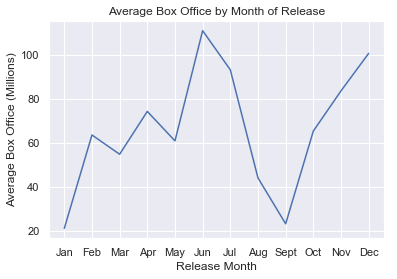

In [44]:
# line plot to show box office relation to months
plt.plot(release_df['Month'],release_df['Average Box Office (millions)'])
plt.xlabel("Release Month")
plt.ylabel("Average Box Office (Millions)")
plt.title("Average Box Office by Month of Release")

# Save image
plt.savefig("Analysis Charts/4. Release Month/monthly_line.png")

plt.show()

In [45]:
# sort data
sorted(release_df['Average Box Office (millions)'])

sorted_release = pd.DataFrame({'Month':['Jan', 'Sept', 'Aug', 'Mar', 'May', 'Feb', 'Oct', 'Apr', 'Nov', 'Jul', 'Dec', 'Jun'],
                               'Average Box Office (millions)':sorted(release_df['Average Box Office (millions)'])
                              })
sorted_release

,Month,Average Box Office (millions)
0,Jan,21.135935
1,Sept,23.217586
2,Aug,44.072004
3,Mar,54.834767
4,May,60.912100
5,Feb,63.600268
6,Oct,65.371941
7,Apr,74.316960
8,Nov,83.642154
9,Jul,93.221184


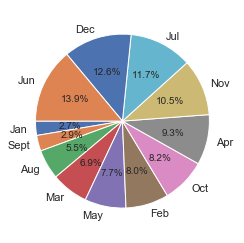

In [46]:
# pie chart percentage per month
plt.pie(sorted_release['Average Box Office (millions)'],labels=sorted_release['Month'],autopct="%1.1f%%",startangle=180)

# Save image
plt.savefig("Analysis Charts/4. Release Month/monthly_pie.png")

plt.show()

In [47]:
# pie chart by quarter
q1 = release_df['Average Box Office (millions)'][0:2].sum()
q2 = release_df['Average Box Office (millions)'][3:5].sum()
q3 = release_df['Average Box Office (millions)'][6:8].sum()
q4 = release_df['Average Box Office (millions)'][9:11].sum()
labels = ['Q1','Q2','Q3','Q4']
size = [q1, q2, q3, q4]

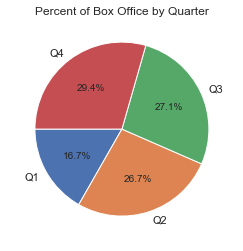

In [48]:
plt.pie(size,labels=labels,autopct="%1.1f%%",startangle=180)
plt.title("Percent of Box Office by Quarter")

# Save image
plt.savefig("Analysis Charts/4. Release Month/quarterly_pie.png")

plt.show()

In [49]:
# Pie chart by Season
summer = release_df['Average Box Office (millions)'][5:7].sum()
fall = release_df['Average Box Office (millions)'][8:10].sum()
winter = release_df['Average Box Office (millions)'][0:1].sum()
winter = winter + release_df['Average Box Office (millions)'][11].sum()
spring = release_df['Average Box Office (millions)'][2:4].sum()

labels = ['Summer','Fall','Winter','Spring']
size = [summer, fall, winter, spring]

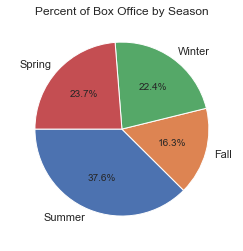

In [50]:
plt.pie(size,labels=labels,autopct="%1.1f%%",startangle=180)
plt.title("Percent of Box Office by Season")

# Save image
plt.savefig("Analysis Charts/4. Release Month/season_pie.png")

plt.show()

In [51]:
# box plot
box = release[['Box Office','Release Month']]
box['Box Office'] = box['Box Office']/1000000
box.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Box Office,Release Month
0,183.277573,4
1,251.476985,6
2,162.001186,6
3,216.900000,3
4,292.568851,7


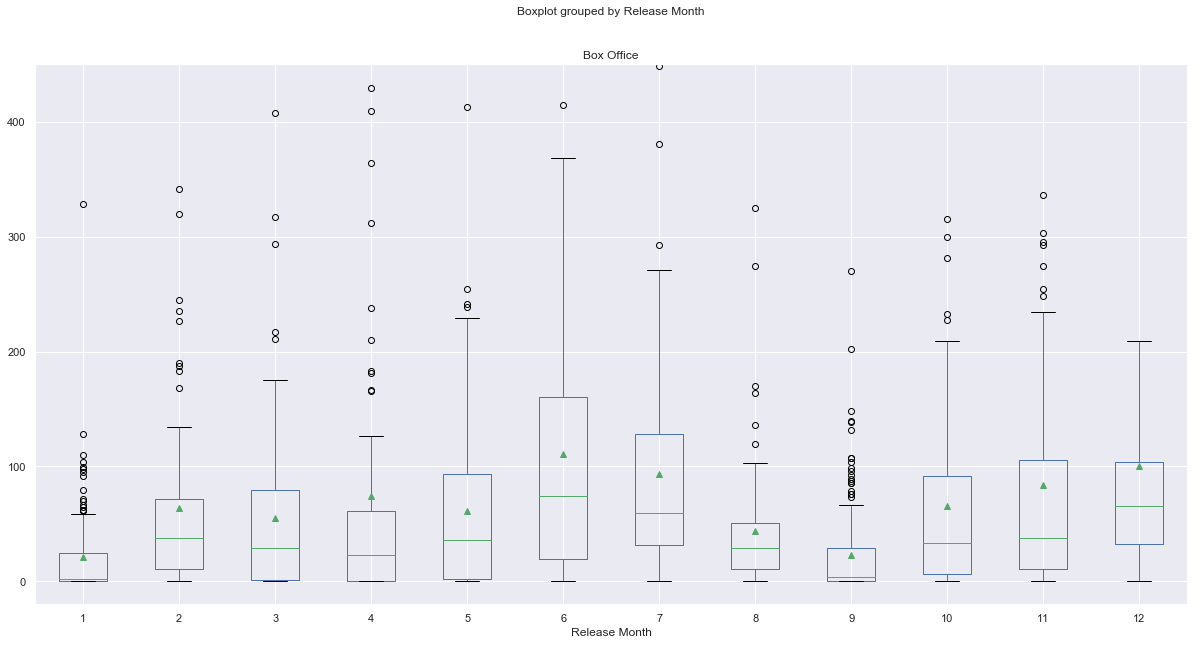

In [52]:
box.boxplot("Box Office", by="Release Month", figsize=(20, 10),showmeans=True)
plt.ylim(-20, 450)

# Save image
plt.savefig("Analysis Charts/4. Release Month/monthly_box.png")

plt.show()

In [53]:
# ANOVA test
Jan = release['Box Office'][release['Release Month'] == 1]
Feb = release['Box Office'][release['Release Month'] == 2]
Mar = release['Box Office'][release['Release Month'] == 3]
Apr = release['Box Office'][release['Release Month'] == 4]
May = release['Box Office'][release['Release Month'] == 5]
Jun = release['Box Office'][release['Release Month'] == 6]
Jul = release['Box Office'][release['Release Month'] == 7]
Aug = release['Box Office'][release['Release Month'] == 8]
Sept = release['Box Office'][release['Release Month'] == 9]
Oct = release['Box Office'][release['Release Month'] == 10]
Nov = release['Box Office'][release['Release Month'] == 11]
Dec = release['Box Office'][release['Release Month'] == 12]


stats.f_oneway(Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec)

F_onewayResult(statistic=10.874730742925472, pvalue=3.6178800066850965e-19)

# Observation

* Box Office earnings peak in the Summer as well as the holiday season. 

* 48.7% of Box Office earnings are from 4 months (June, July, November, December) in these peak times.

* Box Office earnings dip in the few months after each of these peak seasons, like in January and September.

* Quarter 1 is the slowest, only representing 16.7% of yearly Box Office earnings.

* The other quarters have their own slow months as well, but the peak months within them keep their earning up.

* After doing an ANOVA test, the pvalue is less than 0.05 so, this test is significant.



# ------------------------------------------------------------------------------

# 5. Does runtime have an affect the box office results?

We want to see whether runtime significantly effects box office results and whether there is a point where the movies runtime starts to negatively effect the box office results.

This will allow us to determine the optimal runtime to maximize the box office return.


In [54]:
#Read csv with proper encoding
path = "Movie_Data.csv"
movies_runtime = pd.read_csv(path, encoding='latin1')
movies_runtime.head()

,IMDb ID,Title,Runtime (mins),Year,Genres,Release Date,IMDb Rating,Metascore,Rating,Box Office
0,tt1872181,The Amazing Spider-Man 2,142,2014,"Action, Adventure, Sci-Fi",4/10/2014,6.6,53,PG-13,183277573
1,tt1323594,Despicable Me,95,2010,"Animation, Comedy, Family, Fantasy",6/20/2010,7.7,72,PG,251476985
2,tt1375670,Grown Ups,102,2010,Comedy,6/24/2010,6.0,30,PG-13,162001186
3,tt0892769,How to Train Your Dragon,98,2010,"Animation, Action, Adventure, Family, Fantasy",3/18/2010,8.1,74,PG,216900000
4,tt1375666,Inception,148,2010,"Action, Adventure, Sci-Fi, Thriller",7/8/2010,8.8,74,PG-13,292568851


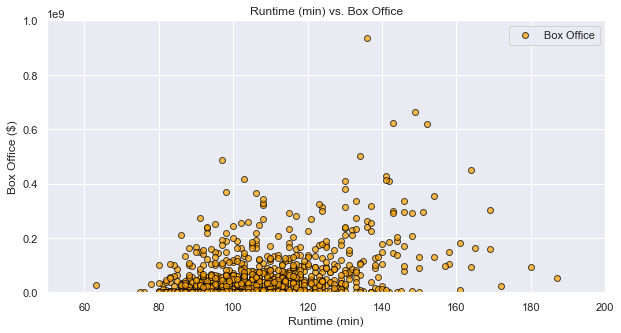

In [55]:
# Create a scatterplot for Runtime vs Box Office
plt.figure(figsize=(10,5))
plt.scatter((movies_runtime["Runtime (mins)"]), movies_runtime["Box Office"], 
            marker = "o", color ="orange", alpha = 0.7, edgecolor ="black")
plt.title("Runtime (min) vs. Box Office")
plt.xlabel("Runtime (min)")
plt.ylabel("Box Office ($)")
plt.xlim(50, 200)
plt.ylim(0, 1000000000)
plt.grid(True)
plt.legend()
plt.savefig("Analysis Charts/5. Runtime/Runtime_vs_Box_Office_scatter.png")
plt.show()

## Observations

From the scatter plot, it can be determined that a large number of movies make less than $100 millions with runtimes ranging from 80 minutes to 180 minutes. This shows that a majority of movies fail to produce at the box office no matter what the runtimes are. However, it does appear that there is a weak correlation between runtime and box office given that the plot shows that as runtime increases, box office results increases as well. This will be further investigated below.

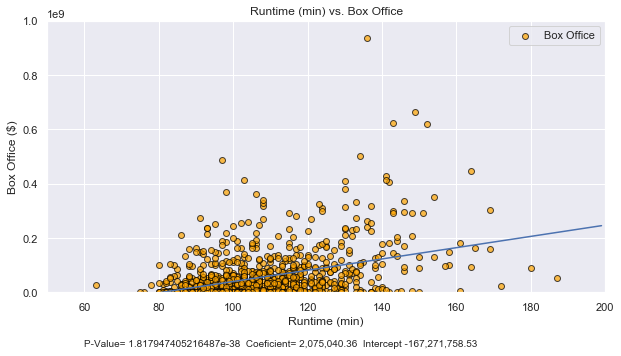

In [56]:
# Linear Regression
x = np.arange(1, 200, 1)
regress_runtime = stats.linregress(movies_runtime['Runtime (mins)'], movies_runtime['Box Office'])
plt.figure(figsize=(10,5))
plt.scatter((movies_runtime["Runtime (mins)"]), movies_runtime["Box Office"], 
            marker = "o", color ="orange", alpha = 0.7, edgecolor ="black")
plt.title("Runtime (min) vs. Box Office")
plt.xlabel("Runtime (min)")
plt.ylabel("Box Office ($)")
plt.xlim(50, 200)
plt.ylim(0, 1000000000)
plt.grid(True)
plt.text(60, -2 * 100000000, 'P-Value= ' + str(regress_runtime[3]) + '  Coeficient= ' + "{:,.2f}".format(regress_runtime[0]) + '  Intercept ' + "{:,.2f}".format(regress_runtime[1]))
plt.legend()
plt.plot(x, x * regress_runtime[0] + regress_runtime[1])


plt.savefig("Analysis Charts/5. Runtime/Runtime_vs_Box_Office_scatter_regression.png")
plt.show()

## Observations

From looking at the scatter plot earlier, it was determined that it appeared that there was some correlation between runtime and box office. After running a simple linear regression and calculating a p-value of 1.81 e-38, it can be concluded that there is a relationship and that box office results increase as runtime increases. This conclusion has to have limits since there has to be a point that the movie would be too long for movie viewers to sit through, an observation on runtimes versus the average box office was done below.

In [57]:
# Create bar chart with ranges of runtimes vs Box Office
bins = [0, 80, 100, 120, 140, 160, 180, 200]

# Create names for the bins
group_names = [" <80", "80-99", "100-119", "120-139", "140-159", "160-179", "180+" ]

# Create a DataFrame
movies_runtime["Runtime (mins)"] = pd.cut(movies_runtime["Runtime (mins)"], bins, labels = group_names)
movies_runtime_groupby = movies_runtime["Runtime (mins)"]

# Create a DataFrame to specific format for bar chart. 
movies_runtime_groupby_df = pd.DataFrame(movies_runtime_groupby)
movies_runtime_join_df = movies_runtime_groupby_df.merge(movies_runtime, on='Runtime (mins)', how='right')
movies_runtime_join_df.drop_duplicates(subset=None, keep="first", inplace=True)
movies_runtime_final_df = movies_runtime_join_df[["Runtime (mins)", "Box Office"]]
groupby_run = movies_runtime_final_df["Box Office"].groupby(movies_runtime_final_df["Runtime (mins)"])
movies_runtime_mean_df = pd.DataFrame(groupby_run.mean())
movies_runtime_mean_df = movies_runtime_mean_df.reset_index()

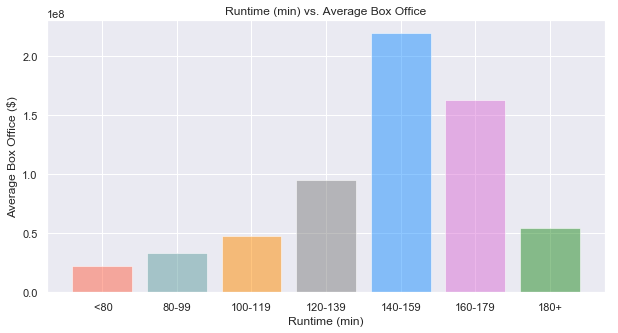

In [58]:
# Bar chart
plt.figure(figsize=(10,5))
color=['tomato', 'cadetblue', 'darkorange','grey','dodgerblue','orchid', 'forestgreen']
plt.bar(movies_runtime_mean_df["Runtime (mins)"], movies_runtime_mean_df["Box Office"], 
        color = color, alpha = 0.5, align = "center")
plt.title("Runtime (min) vs. Average Box Office")
plt.xlabel("Runtime (min)")
plt.ylabel("Average Box Office ($)")
plt.savefig("Analysis Charts/5. Runtime/Runtime_vs_Box_Office_Bar.png")
plt.show()

## Observations

The conclusion from the scatter plot and regression analysis showed that the box office results will increase with runtime. However, it did not specify when that relationship would breakdown. From the bar graph, the runtime that produced the highest average box office results were between 140-159 minutes. This appears to be the point where the runtime will adversely effect the box office results. The ideal runtime to maximize box office returns would therefore be between 140-159 minutes in length. 